In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits= load_digits()

In [3]:
#data shape
digits.data.shape

(1797, 64)

In [4]:
#label data shape
digits.target.shape

(1797,)

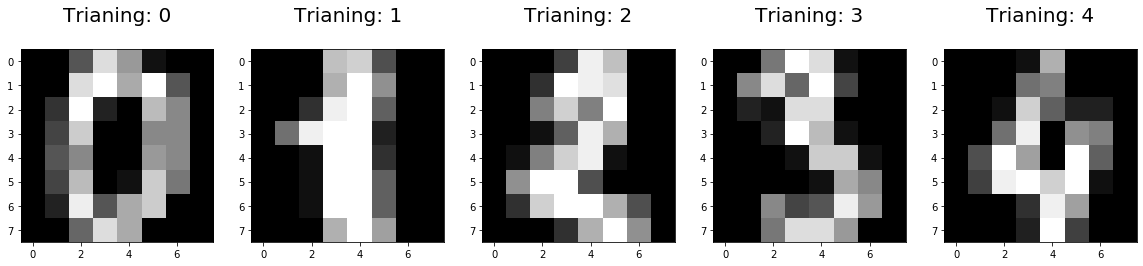

In [6]:
#visualize
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],
                                        digits.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Trianing: %i\n'%label, fontsize = 20)

In [7]:
#use logistic regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state=4)

In [9]:
x_train.shape

(1383, 64)

In [11]:
x_test.shape

(414, 64)

In [12]:
y_train.shape

(1383,)

In [13]:
from sklearn.linear_model import LogisticRegression

In [16]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
logisticReg.predict(x_test[0].reshape(1,-1))

array([8])

In [24]:
logisticReg.predict(x_test[0:10])

array([8, 7, 0, 5, 3, 5, 1, 3, 1, 8])

In [19]:
prediction = logisticReg.predict(x_test)

In [21]:
score = logisticReg.score(x_test, y_test)

In [23]:
score*100

96.1352657004831

In [29]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)

In [31]:
cm    #the more th enumber of diagonals the more the accurate

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  2,  0,  0,  0,  2],
       [ 0,  1,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 43,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 41,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 41]], dtype=int64)

diagnoal represents the acutal and predicted value are same

 ### visualize confusion metrics


Text(0.5, 1, 'Accuracy Score : 0.961352657004831')

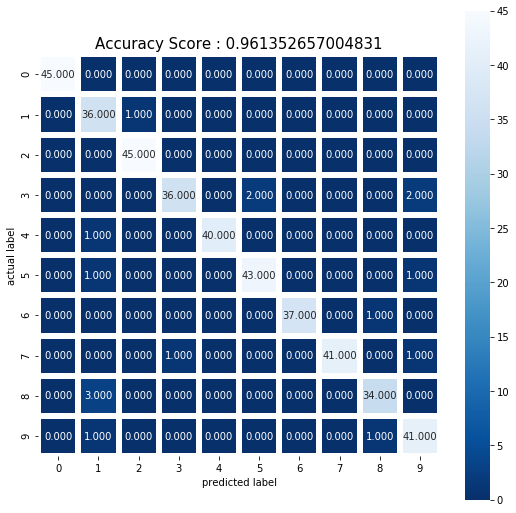

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=5, square = True, cmap = 'Blues_r')
plt.ylabel('actual label')
plt.xlabel('predicted label')
allSampleTesst = 'Accuracy Score : {0}'.format(score)
plt.title(allSampleTesst, size = 15)

# test with few exapmles

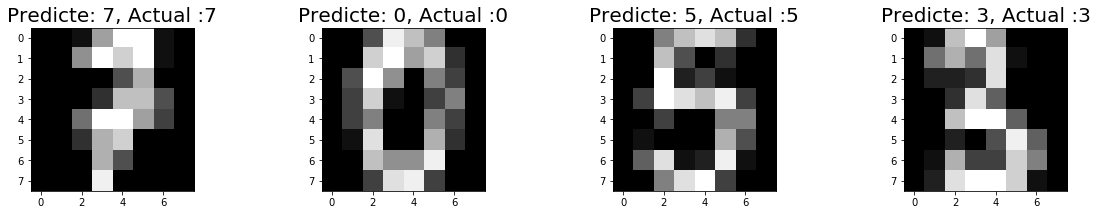

In [35]:
index = 0
classifiedIndex = []
for predict, actual in zip(prediction, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title('Predicte: {}, Actual :{}'.format(prediction[wrong], y_test[wrong]), fontsize = 20)